In [1]:
import psycopg2
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA: Vitals

## Temperature

In [348]:
chartevents_temp_df = pd.read_csv('chartevents_temp.csv')


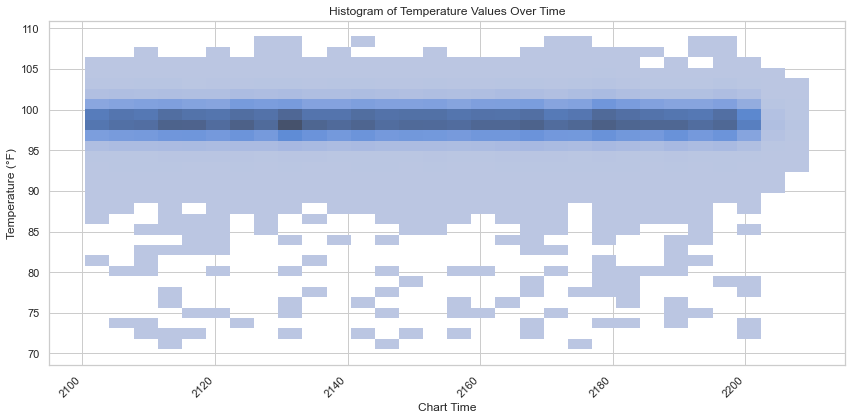

In [429]:
# Convert 'charttime' to datetime format
chartevents_temp_df['charttime'] = pd.to_datetime(chartevents_temp_df['charttime'])
chartevents_temp_df = chartevents_temp_df[(chartevents_temp_df['Final_Temperature_F'] > 70) & (chartevents_temp_df['Final_Temperature_F'] < 110)]

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot the histogram
sns.histplot(x='charttime', y='Final_Temperature_F', data=chartevents_temp_df, kde=True, bins=30)

# Customize plot labels and title
plt.title('Histogram of Temperature Values Over Time')
plt.xlabel('Chart Time')
plt.ylabel('Temperature (°F)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [442]:
subgroup_1_df = pd.read_csv('subgroup_1.csv')
subgroup_2_df = pd.read_csv('subgroup_2.csv')
subgroup_3_df = pd.read_csv('subgroup_3.csv')
subgroup_4_df = pd.read_csv('subgroup_4.csv')
subgroup_5_df = pd.read_csv('subgroup_5.csv')
subgroup_6_df = pd.read_csv('subgroup_6.csv')
subgroup_7_df = pd.read_csv('subgroup_7.csv')

In [443]:
def merge_temperature_for_subgroup(chartevents_temp_df, subgroup_df, subgroup_number):
    if 'level_0' in subgroup_df.columns:
        subgroup_df = subgroup_df.drop('level_0', axis=1)

    subgroup_df.reset_index(inplace=True)

    merged_df = pd.merge(chartevents_temp_df[['subject_id', 'hadm_id', 'icustay_id', 'charttime', 'Final_Temperature_F']],
                        subgroup_df[['subject_id', 'rounded_age', 'admission_type_encoded', 'subgroup']],
                        on='subject_id', how='inner')

    return merged_df

In [444]:
subgroup_1_temp_df = merge_temperature_for_subgroup(chartevents_temp_df, subgroup_1_df, 1)
subgroup_2_temp_df = merge_temperature_for_subgroup(chartevents_temp_df, subgroup_2_df, 2)
subgroup_3_temp_df = merge_temperature_for_subgroup(chartevents_temp_df, subgroup_3_df, 3)
subgroup_4_temp_df = merge_temperature_for_subgroup(chartevents_temp_df, subgroup_4_df, 4)
subgroup_5_temp_df = merge_temperature_for_subgroup(chartevents_temp_df, subgroup_5_df, 5)
subgroup_6_temp_df = merge_temperature_for_subgroup(chartevents_temp_df, subgroup_6_df, 6)
subgroup_7_temp_df = merge_temperature_for_subgroup(chartevents_temp_df, subgroup_7_df, 7)


In [445]:
filter_condition = (subgroup_1_temp_df['Final_Temperature_F'] > 70) & (subgroup_1_temp_df['Final_Temperature_F'] < 110)
subgroup_1_temp_df = subgroup_1_temp_df[filter_condition].reset_index(drop=True)

filter_condition = (subgroup_2_temp_df['Final_Temperature_F'] > 70) & (subgroup_2_temp_df['Final_Temperature_F'] < 110)
subgroup_2_temp_df = subgroup_2_temp_df[filter_condition].reset_index(drop=True)

filter_condition = (subgroup_3_temp_df['Final_Temperature_F'] > 70) & (subgroup_3_temp_df['Final_Temperature_F'] < 110)
subgroup_3_temp_df = subgroup_3_temp_df[filter_condition].reset_index(drop=True)

filter_condition = (subgroup_4_temp_df['Final_Temperature_F'] > 70) & (subgroup_4_temp_df['Final_Temperature_F'] < 110)
subgroup_4_temp_df = subgroup_4_temp_df[filter_condition].reset_index(drop=True)

filter_condition = (subgroup_5_temp_df['Final_Temperature_F'] > 70) & (subgroup_5_temp_df['Final_Temperature_F'] < 110)
subgroup_5_temp_df = subgroup_5_temp_df[filter_condition].reset_index(drop=True)

filter_condition = (subgroup_6_temp_df['Final_Temperature_F'] > 70) & (subgroup_6_temp_df['Final_Temperature_F'] < 110)
subgroup_6_temp_df = subgroup_6_temp_df[filter_condition].reset_index(drop=True)

filter_condition = (subgroup_7_temp_df['Final_Temperature_F'] > 70) & (subgroup_7_temp_df['Final_Temperature_F'] < 110)
subgroup_7_temp_df = subgroup_7_temp_df[filter_condition].reset_index(drop=True)


In [446]:


original_stats = chartevents_temp_df['Final_Temperature_F'].agg(lambda x: pd.Series({'mean': x.mean(), 'max': x.max(), 'mode': x.mode().iloc[0], 'std': x.std(), 'median': x.median()}))

subgroup_1_stats = subgroup_1_temp_df['Final_Temperature_F'].agg(lambda x: pd.Series({'mean': x.mean(), 'max': x.max(), 'mode': x.mode().iloc[0], 'std': x.std(), 'median': x.median()}))

subgroup_2_stats = subgroup_2_temp_df['Final_Temperature_F'].agg(lambda x: pd.Series({'mean': x.mean(), 'max': x.max(), 'mode': x.mode().iloc[0], 'std': x.std(), 'median': x.median()}))

subgroup_3_stats = subgroup_3_temp_df['Final_Temperature_F'].agg(lambda x: pd.Series({'mean': x.mean(), 'max': x.max(), 'mode': x.mode().iloc[0], 'std': x.std(), 'median': x.median()}))

subgroup_4_stats = subgroup_4_temp_df['Final_Temperature_F'].agg(lambda x: pd.Series({'mean': x.mean(), 'max': x.max(), 'mode': x.mode().iloc[0], 'std': x.std(), 'median': x.median()}))

subgroup_5_stats = subgroup_5_temp_df['Final_Temperature_F'].agg(lambda x: pd.Series({'mean': x.mean(), 'max': x.max(), 'mode': x.mode().iloc[0], 'std': x.std(), 'median': x.median()}))

subgroup_6_stats = subgroup_6_temp_df['Final_Temperature_F'].agg(lambda x: pd.Series({'mean': x.mean(), 'max': x.max(), 'mode': x.mode().iloc[0], 'std': x.std(), 'median': x.median()}))

subgroup_7_stats = subgroup_7_temp_df['Final_Temperature_F'].agg(lambda x: pd.Series({'mean': x.mean(), 'max': x.max(), 'mode': x.mode().iloc[0], 'std': x.std(), 'median': x.median()}))

result_df = pd.DataFrame({
    'Statistic': ['mean', 'max', 'mode', 'std', 'median'],
    'Original Chartevents': original_stats.values,
    'Subgroup 1': subgroup_1_stats.values,
    'Subgroup 2': subgroup_2_stats.values,
    'Subgroup 3': subgroup_3_stats.values,
    'Subgroup 4': subgroup_4_stats.values,
    'Subgroup 5': subgroup_5_stats.values,
    'Subgroup 6': subgroup_6_stats.values,
    'Subgroup 7': subgroup_7_stats.values
})

result_df.set_index('Statistic', inplace=True)

result_df


,Original Chartevents,Subgroup 1,Subgroup 2,Subgroup 3,Subgroup 4,Subgroup 5,Subgroup 6,Subgroup 7
Statistic,,,,,,,,
mean,98.612467,98.381712,98.289350,98.404344,98.698643,98.909630,98.559659,98.270449
max,109.000043,107.000057,109.000043,107.900057,109.000043,108.139999,109.000043,106.900002
mode,98.600000,98.600000,98.600000,98.600000,98.600000,98.600000,98.600000,98.600000
std,1.520419,1.450650,1.435112,1.508261,1.449904,1.555369,1.507753,1.401591
median,98.600000,98.300003,98.239999,98.300003,98.700079,98.800003,98.500000,98.200043


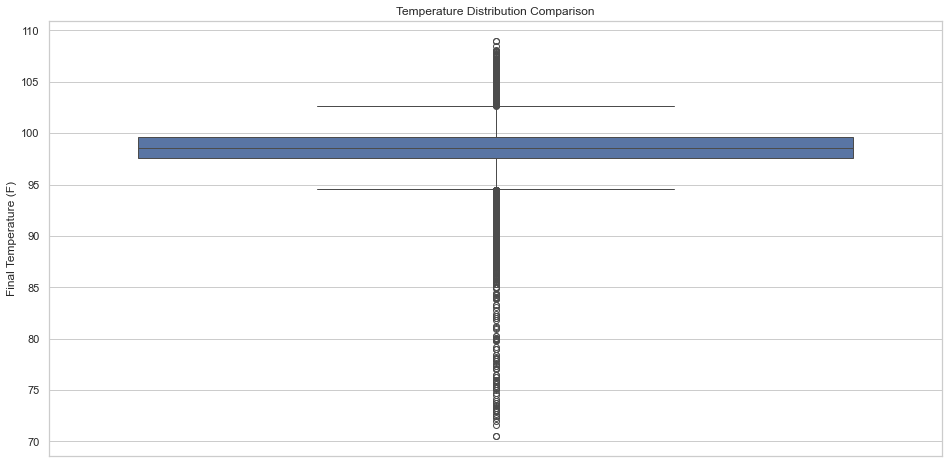

In [447]:
# Plot boxplot
plt.figure(figsize=(16, 8))
sns.boxplot(data=chartevents_temp_df, y='Final_Temperature_F')
plt.title('Temperature Distribution Comparison')
plt.ylabel('Final Temperature (F)')
plt.show()

/var/folders/48/vk7lyccx60x4918_6lqc64fw0000gn/T/ipykernel_60552/3053405559.py:1: FutureWarning: The behavior of pd.concat with len(keys) != len(objs) is deprecated. In a future version this will raise instead of truncating to the smaller of the two sequences
  all_subgroups_df = pd.concat([subgroup_1_temp_df, subgroup_2_temp_df, subgroup_3_temp_df,


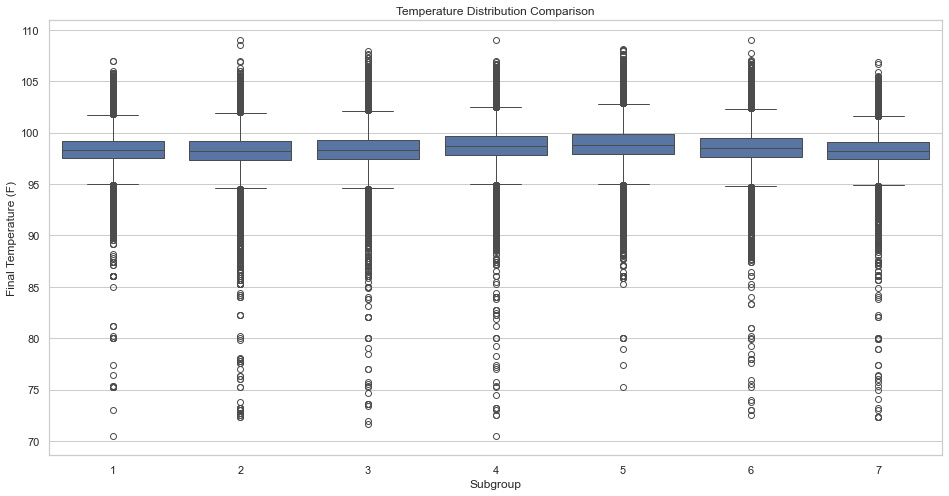

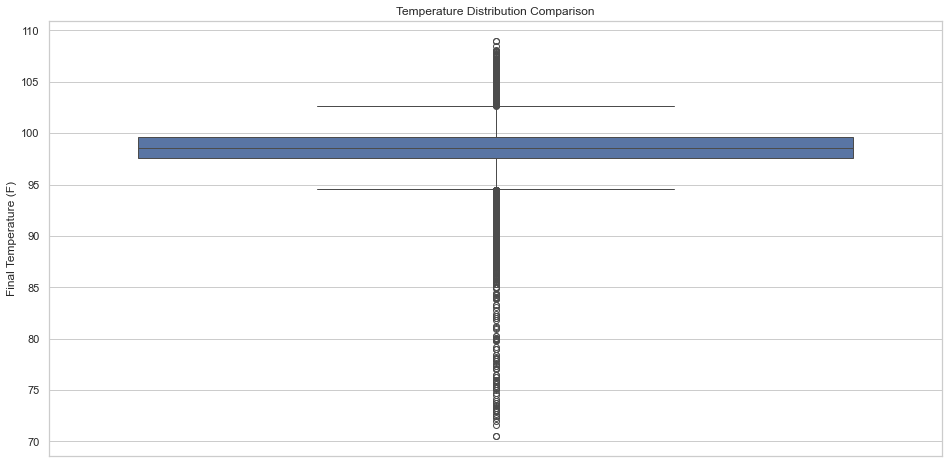

In [458]:
all_subgroups_df = pd.concat([subgroup_1_temp_df, subgroup_2_temp_df, subgroup_3_temp_df, 
                                subgroup_4_temp_df, subgroup_5_temp_df, subgroup_6_temp_df, 
                                subgroup_7_temp_df], keys=['Subgroup 1', 'Subgroup 2', 'Subgroup 3', 'Subgroup 4', 'Subgroup 5', 'Subgroup 6', 'Subgroup 7', 'Original'])

# Plot boxplot
plt.figure(figsize=(16, 8))
sns.boxplot(data=all_subgroups_df, x='subgroup', y='Final_Temperature_F')
plt.title('Temperature Distribution Comparison')
plt.xlabel('Subgroup')
plt.ylabel('Final Temperature (F)')
plt.show()

# Plot boxplot
plt.figure(figsize=(16, 8))
sns.boxplot(data=chartevents_temp_df, y='Final_Temperature_F')
plt.title('Temperature Distribution Comparison')
plt.ylabel('Final Temperature (F)')
plt.show()

In [449]:
from scipy.stats import ttest_ind

# Assuming 'Final_Temperature_F' is the column of interest
subgroup_temps = subgroup_1_temp_df['Final_Temperature_F']
original_temps = chartevents_temp_df['Final_Temperature_F']

# Perform t-test
t_stat, p_value = ttest_ind(subgroup_temps, original_temps, equal_var=False)  # Assuming unequal variances

# Print results
print(f'T-statistic: {t_stat}\nP-value: {p_value}')

# Check for statistical significance
if p_value < 0.05:
    print("Reject the null hypothesis: There is a statistically significant difference.")
else:
    print("Fail to reject the null hypothesis: No statistically significant difference.")


T-statistic: -85.94337460740013
P-value: 0.0
Reject the null hypothesis: There is a statistically significant difference.


In [457]:
from scipy.stats import ttest_ind

# Assuming 'Final_Temperature_F' is the column of interest
subgroup_temps = subgroup_1_temp_df['Final_Temperature_F']
original_temps = chartevents_temp_df['Final_Temperature_F']

# Perform t-test
t_stat, p_value = ttest_ind(subgroup_temps, original_temps, equal_var=False)  # Assuming unequal variances

# Print results
print(f'T-statistic: {t_stat}\nP-value: {p_value}')

# Check for statistical significance
if p_value < 0.05:
    print("Reject the null hypothesis: There is a statistically significant difference.")
else:
    print("Fail to reject the null hypothesis: No statistically significant difference.")


T-statistic: -85.94337460740013
P-value: 0.0
Reject the null hypothesis: There is a statistically significant difference.


## Respiratory Rate

In [22]:
chartevents_rr_df = pd.read_csv('chartevents_rr.csv')



In [30]:
list(chartevents_rr_df.columns[4:].values)


['Respiratory Rate',
 'Respiratory Rate (Set)',
 'Respiratory Rate (Total)',
 'Respiratory Rate (spontaneous)',
 'Respiratory Rate Set',
 'RespiratoryRate_combined']

In [466]:
chartevents_rr_df[chartevents_rr_df['RespiratoryRate_combined'] > 30]

,subject_id,hadm_id,icustay_id,charttime,Respiratory Rate,Respiratory Rate (Set),Respiratory Rate (Total),Respiratory Rate (spontaneous),Respiratory Rate Set,RespiratoryRate_combined,Source
144,3,145834,211552.0,2101-10-25 17:00:00,31.0,NaN,NaN,NaN,NaN,31.0,Original
150,3,145834,211552.0,2101-10-25 20:00:00,34.0,NaN,NaN,NaN,NaN,34.0,Original
163,3,145834,211552.0,2101-10-26 09:00:00,36.0,NaN,NaN,NaN,NaN,36.0,Original
183,4,185777,294638.0,2191-03-16 17:00:00,32.0,NaN,NaN,NaN,NaN,32.0,Original
642,12,112213,232669.0,2104-08-11 14:15:00,32.0,NaN,NaN,NaN,NaN,32.0,Original
...,...,...,...,...,...,...,...,...,...,...,...
6263118,99991,151118,226241.0,2184-12-29 03:30:00,36.0,NaN,NaN,NaN,NaN,36.0,Original
6263119,99991,151118,226241.0,2184-12-29 03:40:00,35.0,NaN,NaN,NaN,NaN,35.0,Original
6263120,99991,151118,226241.0,2184-12-29 03:45:00,36.0,NaN,NaN,NaN,NaN,36.0,Original
6263121,99991,151118,226241.0,2184-12-29 04:15:00,31.0,NaN,NaN,NaN,NaN,31.0,Original


In [487]:
chartevents_rr_df.RespiratoryRate_combined.describe()
7

count    6.263265e+06
mean     2.039807e+01
std      9.412437e+02
min      0.000000e+00
25%      1.600000e+01
50%      1.900000e+01
75%      2.400000e+01
max      2.355555e+06
Name: RespiratoryRate_combined, dtype: float64

In [474]:
# Fixing Negative values
index_to_replace = chartevents_rr_df[chartevents_rr_df['RespiratoryRate_combined'] < 0].index[0]
chartevents_rr_df.loc[index_to_replace, 'RespiratoryRate_combined'] = chartevents_rr_df.loc[index_to_replace, 'Respiratory Rate (spontaneous)']

In [498]:

# Assuming your DataFrame is named chartevents_rr_df
# Replace 'RespiratoryRate_combined' with the actual column name
column_name = 'RespiratoryRate_combined'

# Calculate the IQR
Q1 = chartevents_rr_df[column_name].quantile(0.25)
Q3 = chartevents_rr_df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = chartevents_rr_df[(chartevents_rr_df[column_name] < lower_bound) | (chartevents_rr_df[column_name] > upper_bound)]

outliers.loc[outliers['RespiratoryRate_combined'] > 100, 'RespiratoryRate_combined'] /= 10
outliers.loc[outliers['RespiratoryRate_combined'] > 100, 'RespiratoryRate_combined'] /= 10
outliers.loc[outliers['RespiratoryRate_combined'] > 100, 'RespiratoryRate_combined'] /= 1000

outliers[outliers['RespiratoryRate_combined'] < 10]

,subject_id,hadm_id,icustay_id,charttime,Respiratory Rate,Respiratory Rate (Set),Respiratory Rate (Total),Respiratory Rate (spontaneous),Respiratory Rate Set,RespiratoryRate_combined,Source
6,3,145834,211552.0,2101-10-20 21:15:00,0.0,NaN,NaN,NaN,NaN,0.0,Original
7,3,145834,211552.0,2101-10-20 21:30:00,0.0,NaN,NaN,NaN,NaN,0.0,Original
9,3,145834,211552.0,2101-10-20 22:15:00,0.0,NaN,NaN,NaN,NaN,0.0,Original
10,3,145834,211552.0,2101-10-20 22:30:00,0.0,NaN,NaN,NaN,NaN,0.0,Original
16,3,145834,211552.0,2101-10-21 01:00:00,0.0,NaN,NaN,NaN,NaN,0.0,Original
...,...,...,...,...,...,...,...,...,...,...,...
6260503,99899,188409,245756.0,2113-06-13 16:30:00,0.0,NaN,NaN,NaN,NaN,0.0,Original
6261967,99955,108494,243255.0,2139-07-19 00:00:00,0.0,NaN,NaN,NaN,NaN,0.0,Original
6262530,99982,151454,221194.0,2156-11-29 14:36:00,0.0,NaN,NaN,NaN,NaN,0.0,Original
6262543,99982,151454,221194.0,2156-11-30 22:01:00,0.0,NaN,NaN,NaN,NaN,0.0,Original


In [388]:
def merge_respiratory_to_subgroup(respiratory_df, subgroup_df):
    respiratory_df['charttime'] = pd.to_datetime(respiratory_df['charttime'])
    
    if 'level_0' in subgroup_df.columns:
        subgroup_df = subgroup_df.drop('level_0', axis=1)

    subgroup_df.reset_index(inplace=True)

    filtered_respiratory_df = respiratory_df[respiratory_df['subject_id'].isin(subgroup_df['subject_id'])]

    merged_df = pd.merge(filtered_respiratory_df[['subject_id', 'hadm_id', 'icustay_id', 'charttime', 'RespiratoryRate_combined']],
                        subgroup_df[['subject_id', 'rounded_age', 'admission_type_encoded', 'subgroup']],
                        on='subject_id', how='outer')

    return merged_df

In [395]:
subgroup_1_rr_df = merge_respiratory_to_subgroup(chartevents_rr_df, subgroup_1_df)
subgroup_2_rr_df = merge_respiratory_to_subgroup(chartevents_rr_df, subgroup_2_df)
subgroup_3_rr_df = merge_respiratory_to_subgroup(chartevents_rr_df, subgroup_3_df)
subgroup_4_rr_df = merge_respiratory_to_subgroup(chartevents_rr_df, subgroup_4_df)
subgroup_5_rr_df = merge_respiratory_to_subgroup(chartevents_rr_df, subgroup_5_df)
subgroup_6_rr_df = merge_respiratory_to_subgroup(chartevents_rr_df, subgroup_6_df)
subgroup_7_rr_df = merge_respiratory_to_subgroup(chartevents_rr_df, subgroup_7_df)


In [392]:
subgroup_1_rr_df.columns

Index(['subject_id', 'hadm_id', 'icustay_id', 'charttime',
       'RespiratoryRate_combined', 'rounded_age', 'admission_type_encoded',
       'subgroup'],
      dtype='object')

In [393]:
chartevents_rr_df.columns

Index(['subject_id', 'hadm_id', 'icustay_id', 'charttime', 'Respiratory Rate',
       'Respiratory Rate (Set)', 'Respiratory Rate (Total)',
       'Respiratory Rate (spontaneous)', 'Respiratory Rate Set',
       'RespiratoryRate_combined'],
      dtype='object')

In [399]:

resp_dfs = [subgroup_1_rr_df,
            subgroup_2_rr_df,
            subgroup_3_rr_df,
            subgroup_4_rr_df,
            subgroup_5_rr_df,
            subgroup_6_rr_df,
            subgroup_7_rr_df]


def calculate_stats(df):
    return df['RespiratoryRate_combined'].agg(lambda x: pd.Series({
        'mean': x.mean(),
        'max': x.max(),
        'mode': x.mode().iloc[0],
        'std': x.std(),
        'median': x.median()
    }))

resp_stats_list = []

for i, df in enumerate(resp_dfs):
    subgroup_stats = calculate_stats(df)
    resp_stats_list.append(subgroup_stats)

result_resp_df = pd.DataFrame(resp_stats_list, index=[f'Subgroup {i + 1}' for i in range(len(resp_dfs))])

result_resp_df.loc['Original Chartevents'] = calculate_stats(chartevents_rr_df)

result_resp_df = result_resp_df.transpose()

result_resp_df


,Subgroup 1,Subgroup 2,Subgroup 3,Subgroup 4,Subgroup 5,Subgroup 6,Subgroup 7,Original Chartevents
mean,18.817742,20.473921,19.990236,2.080735e+01,19.558376,20.302311,20.251847,2.039807e+01
max,1416.000000,2615.000000,3129.000000,2.355555e+06,464.000000,2423.000000,2210.000000,2.355555e+06
mode,16.000000,20.000000,18.000000,1.800000e+01,16.000000,20.000000,20.000000,1.800000e+01
std,6.025228,6.503185,8.496758,1.554295e+03,6.541060,7.289371,6.775131,9.412437e+02
median,18.000000,20.000000,19.000000,1.900000e+01,19.000000,20.000000,20.000000,1.900000e+01


/var/folders/48/vk7lyccx60x4918_6lqc64fw0000gn/T/ipykernel_60552/3801425353.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Source', y='RespiratoryRate_combined', data=all_respiratory_rates_df, palette='viridis')


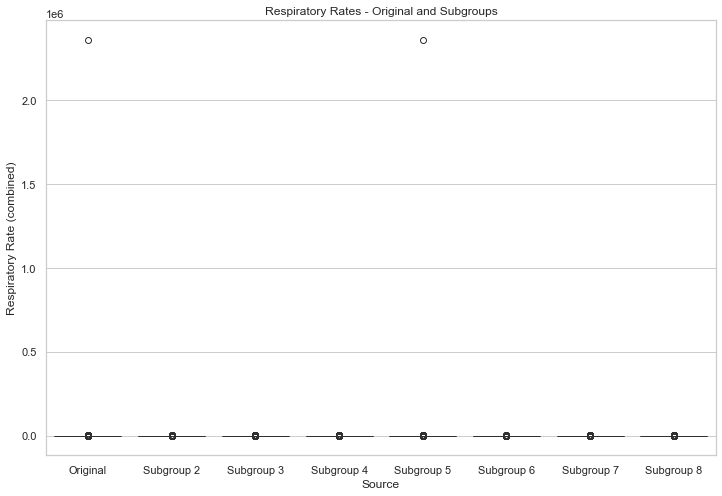

In [420]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have DataFrames: chartevents_rr_df, subgroup_1_rr_df, ..., subgroup_7_rr_df

# Combine all DataFrames into a list
all_rr_dfs = [chartevents_rr_df, subgroup_1_rr_df, subgroup_2_rr_df, subgroup_3_rr_df, subgroup_4_rr_df, subgroup_5_rr_df, subgroup_6_rr_df, subgroup_7_rr_df]

# Create a new column to identify the source subgroup
for i, df in enumerate(all_rr_dfs):
    df['Source'] = f'Subgroup {i + 1}' if i > 0 else 'Original'

# Concatenate all DataFrames into a single DataFrame
all_respiratory_rates_df = pd.concat(all_rr_dfs, ignore_index=True)

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Source', y='RespiratoryRate_combined', data=all_respiratory_rates_df, palette='viridis')
plt.title('Respiratory Rates - Original and Subgroups')
plt.xlabel('Source')
plt.ylabel('Respiratory Rate (combined)')
plt.show()
